# 2CSSID_TP_ Algorithmes d’Uzawa

**Etudiente 01 :** CHOUCHOU Fatma Ibtissam

**Etudiente 02 :** BOUMAZOUZA Ines Manel

**Etudiente 03 :** GUERROUACHE Hiba

**Etudiente 04 :** DJEBLAHI Maria

In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np  # Pour le calcul numérique
import matplotlib.pyplot as plt  # Pour la création de graphiques 2D
from mpl_toolkits.mplot3d import Axes3D  # Pour la création de graphiques 3D
from matplotlib import cm  # Pour la création de cartes de couleurs


# Implémentation de l'algorithme DGPF

In [ ]:
# Définition de la fonction de descente de gradient à pas fixe
def gradient_descent_fixed_step(derivative_lagrangian, x0, step_size, tol, max_iterations):
    # Initialisation de la position de départ
    x = np.array(x0, dtype=float)

    # Boucle sur le nombre maximum d'itérations
    for iteration in range(max_iterations):
        # Calcul du gradient de la fonction de Lagrange à la position actuelle
        gradient = derivative_lagrangian(x)
        # Calcul de la norme du gradient
        gradient_norm = np.linalg.norm(gradient)

        # Si la norme du gradient est inférieure à la tolérance, on arrête l'algorithme
        if gradient_norm < tol:
            break

        # Mise à jour de la position en se déplaçant dans la direction opposée au gradient
        x = x - step_size * gradient

    # Retourne la position finale après la descente de gradient
    return x


# Implémentation de l'algorithme DGPV



In [ ]:
def gradient_descent_variable(derivative_lagrangian, x0, step_size, tol, max_iterations):
    x = np.array(x0, dtype=float)
    i=0
    for iteration in range(max_iterations):
        gradient = derivative_lagrangian(x)
        gradient_norm = np.linalg.norm(gradient)

        if gradient_norm < tol:
            break

        x = x - step_size * gradient
        # Utilisation de la méthode de decroissance quadratique
        step_size = step_size / (i+1)**2
        i+=1
    return x

# Implémentation de l'algorithme d'UZAWA avec DGPF

### Avec nombre d'itérations max

In [ ]:
# Définition de la fonction de l'algorithme d'Uzawa en mettant en entrée le nombre d'itératiosn max
def uzawa_algorithm_Nmax(objective_func, gradient_func, constraint_func, gradient_constraint_func, x0, lambda0, tau, gd_step, tol=1e-8, max_iter=100):
    # Initialisation de la position de départ et du multiplicateur de Lagrange
    x = np.array(x0, dtype=float)
    lambda_ = np.array(lambda0, dtype=float)

    # Initialisation des listes pour stocker l'historique des positions et des multiplicateurs de Lagrange
    X_prev = [x.copy()]
    lambda_prev = [lambda_.copy()]

    # Initialisation du compteur d'itérations
    iteration = 1

    # Boucle jusqu'à ce que le nombre maximum d'itérations soit atteint
    while iteration < max_iter :
        # Ajout de la position et du multiplicateur de Lagrange actuels à l'historique
        X_prev.append(x.copy())
        lambda_prev.append(lambda_.copy())

        # Mise à jour de la position en utilisant la descente de gradient
        derivative_lagrangian = lambda x: gradient_func(x) + lambda_ * gradient_constraint_func(x, lambda_)
        x = gradient_descent_fixed_step(derivative_lagrangian, x , gd_step, tol, max_iter)

        # Mise à jour du multiplicateur de Lagrange en utilisant les contraintes linéaires
        lambda_ = np.maximum(0, lambda_ + tau * constraint_func(x))

        # Ajout de la nouvelle position et du nouveau multiplicateur de Lagrange à l'historique
        X_prev.append(x.copy())
        lambda_prev.append(lambda_.copy())

        # Incrémentation du compteur d'itérations
        iteration += 1

    # Retourne l'historique des positions et des multiplicateurs de Lagrange
    return X_prev, lambda_prev


### Avec la méthode des incréments

In [ ]:
# Définition de la fonction de l'algorithme d'Uzawa en utilisant comme test d'arrêt la méthode des incréments
def uzawa_algorithm_Tol(objective_func, gradient_func, constraint_func, gradient_constraint_func, x0, lambda0, tau, gd_step, tol=1e-8):
    # Initialisation de la position de départ et du multiplicateur de Lagrange
    x = np.array(x0, dtype=float)
    lambda_ = np.array(lambda0, dtype=float)

    # Initialisation des listes pour stocker l'historique des positions et des multiplicateurs de Lagrange
    X_prev = [x.copy()]
    lambda_prev = [lambda_.copy()]

    # Initialisation du compteur d'itérations
    iteration = 1

    # Boucle jusqu'à convergence
    while True :
        # Ajout de la position et du multiplicateur de Lagrange actuels à l'historique
        X_prev.append(x.copy())
        lambda_prev.append(lambda_.copy())

        # Mise à jour de la position en utilisant la descente de gradient
        derivative_lagrangian = lambda x: gradient_func(x) + lambda_ * gradient_constraint_func(x, lambda_)
        x = gradient_descent_fixed_step(derivative_lagrangian, x , gd_step, tol, 100)

        # Mise à jour du multiplicateur de Lagrange en utilisant les contraintes linéaires
        lambda_ = np.maximum(0, lambda_ + tau * constraint_func(x))

        # Vérification de la convergence
        if np.linalg.norm(x - X_prev[-2]) < tol:  # Utilisez X_prev[-2] car x a été mis à jour
            # Ajout de la nouvelle position et du nouveau multiplicateur de Lagrange à l'historique
            X_prev.append(x.copy())
            lambda_prev.append(lambda_.copy())
            print(f"Converged after {iteration} iterations.")
            break

        # Ajout de la nouvelle position et du nouveau multiplicateur de Lagrange à l'historique
        X_prev.append(x.copy())
        lambda_prev.append(lambda_.copy())

        # Incrémentation du compteur d'itérations
        iteration += 1

    # Retourne l'historique des positions et des multiplicateurs de Lagrange
    return X_prev, lambda_prev


# Implémentation de l'algorithme d'UZAWA avec DGPV

### Avec nombre d'itérations max

In [ ]:
# Définition de la fonction de l'algorithme d'Uzawa en mettant en entrée le nombre d'itératiosn max
def uzawa_algorithm_Nmax_dgpv(objective_func, gradient_func, constraint_func, gradient_constraint_func, x0, lambda0, tau, gd_step, tol=1e-8, max_iter=100):
    # Initialisation de la position de départ et du multiplicateur de Lagrange
    x = np.array(x0, dtype=float)
    lambda_ = np.array(lambda0, dtype=float)

    # Initialisation des listes pour stocker l'historique des positions et des multiplicateurs de Lagrange
    X_prev = [x.copy()]
    lambda_prev = [lambda_.copy()]

    # Initialisation du compteur d'itérations
    iteration = 1

    # Boucle jusqu'à ce que le nombre maximum d'itérations soit atteint
    while iteration < max_iter :
        # Ajout de la position et du multiplicateur de Lagrange actuels à l'historique
        X_prev.append(x.copy())
        lambda_prev.append(lambda_.copy())

        # Mise à jour de la position en utilisant la descente de gradient
        derivative_lagrangian = lambda x: gradient_func(x) + lambda_ * gradient_constraint_func(x, lambda_)
        x = gradient_descent_variable(derivative_lagrangian, x , gd_step, tol, max_iter)

        # Mise à jour du multiplicateur de Lagrange en utilisant les contraintes linéaires
        lambda_ = np.maximum(0, lambda_ + tau * constraint_func(x))

        # Ajout de la nouvelle position et du nouveau multiplicateur de Lagrange à l'historique
        X_prev.append(x.copy())
        lambda_prev.append(lambda_.copy())

        # Incrémentation du compteur d'itérations
        iteration += 1

    # Retourne l'historique des positions et des multiplicateurs de Lagrange
    return X_prev, lambda_prev


### Avec la méthode des incréments

In [ ]:
# Définition de la fonction de l'algorithme d'Uzawa en utilisant comme test d'arrêt la méthode des incréments
def uzawa_algorithm_Tol_dgpv(objective_func, gradient_func, constraint_func, gradient_constraint_func, x0, lambda0, tau, gd_step, tol=1e-8):
    # Initialisation de la position de départ et du multiplicateur de Lagrange
    x = np.array(x0, dtype=float)
    lambda_ = np.array(lambda0, dtype=float)

    # Initialisation des listes pour stocker l'historique des positions et des multiplicateurs de Lagrange
    X_prev = [x.copy()]
    lambda_prev = [lambda_.copy()]

    # Initialisation du compteur d'itérations
    iteration = 1

    # Boucle jusqu'à convergence
    while True :
        # Ajout de la position et du multiplicateur de Lagrange actuels à l'historique
        X_prev.append(x.copy())
        lambda_prev.append(lambda_.copy())

        # Mise à jour de la position en utilisant la descente de gradient
        derivative_lagrangian = lambda x: gradient_func(x) + lambda_ * gradient_constraint_func(x, lambda_)
        x = gradient_descent_variable(derivative_lagrangian, x , gd_step, tol, 100)

        # Mise à jour du multiplicateur de Lagrange en utilisant les contraintes linéaires
        lambda_ = np.maximum(0, lambda_ + tau * constraint_func(x))

        # Vérification de la convergence
        if np.linalg.norm(x - X_prev[-2]) < tol:  # Utilisez X_prev[-2] car x a été mis à jour
            # Ajout de la nouvelle position et du nouveau multiplicateur de Lagrange à l'historique
            X_prev.append(x.copy())
            lambda_prev.append(lambda_.copy())
            print(f"Converged after {iteration} iterations.")
            break

        # Ajout de la nouvelle position et du nouveau multiplicateur de Lagrange à l'historique
        X_prev.append(x.copy())
        lambda_prev.append(lambda_.copy())

        # Incrémentation du compteur d'itérations
        iteration += 1

    # Retourne l'historique des positions et des multiplicateurs de Lagrange
    return X_prev, lambda_prev


###  Fonction pour Tracer la courbe de la fonction et la contrainte en 3d et 2d

In [ ]:
def Trace (Fonction_objective, Contrainte ) :
    # Définir la plage de valeurs pour les axes x et y
    x_range = np.linspace(-5, 5, 100)
    y_range = np.linspace(-5, 5, 100)

    # Créer une grille de coordonnées à partir des plages de valeurs
    X, Y = np.meshgrid(x_range, y_range)

    # Calculer les valeurs de la fonction objectif et de la contrainte sur la grille
    Z_objective = Fonction_objective([X, Y])
    Z_constraint = Contrainte([X, Y])[0]

    # Créer une figure avec deux sous-tracés
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Tracer la fonction objectif dans le premier sous-tracé
    ax[0].contour(X, Y, Z_objective, levels=20, cmap='viridis')
    ax[0].set_title('Fonction Objectif')

    # Tracer la fonction de contrainte dans le deuxième sous-tracé
    ax[1].contour(X, Y, Z_constraint, levels=[0], colors='r')
    ax[1].set_title('Fonction de Contrainte')

    # Afficher la figure
    plt.show()

    # Créer une nouvelle figure pour le tracé en 3D
    fig_3d = plt.figure(figsize=(10, 8))
    ax_3d = fig_3d.add_subplot(111, projection='3d')

    # Tracer la fonction objectif en 3D
    ax_3d.plot_surface(X, Y, Z_objective, cmap='viridis', alpha=0.7)
    ax_3d.set_title('Fonction Objectif en 3D')

    # Créer une surface pour la fonction de contrainte en 3D
    constraint_surface = np.zeros_like(Z_objective)
    constraint_surface[Z_constraint == 0] = np.nan  # Mettez à nan pour ne pas afficher la surface où la contrainte est satisfaite

    # Tracer la surface de contrainte en 3D
    ax_3d.plot_surface(X, Y, constraint_surface, color='r', alpha=0.5)

    # Afficher la figure en 3D
    plt.show()


### Fonction pour tracer la courbe de niveau de la fonction objectif et et le chemin suivi par l’algorithme d’optimisation.

In [ ]:
def plot_contour_1(objective_func,constraint_func,X_history,x0_example ):
    # Définir l'intervalle pour les axes x et y
    delta = 0.025
    x = np.arange(-16, 16, delta)
    y = np.arange(-16, 16, delta)

    # Créer une grille de coordonnées à partir des intervalles
    X, Y = np.meshgrid(x, y)

    # Calculer les valeurs de la fonction objectif et de la contrainte sur la grille
    F =  objective_func([X, Y])
    G = constraint_func([X, Y])

    # Initialiser les listes pour stocker les coordonnées des points minimum et du point selle
    minsF_x = [0, 0, 0]
    minsF_y = [0, 0, 0]

    # Extraire les coordonnées x et y des points de l'historique
    x_iterations = [X_history[i][0] for i in range(len(X_history))]
    y_iterations = [X_history[i][1] for i in range(len(X_history))]

    # Créer une figure et un axe pour le tracé
    fig, ax = plt.subplots()

    # Tracer les itérations de l'algorithme
    gradient_iterations = ax.plot(x_iterations, y_iterations,color="magenta")
    gradient_iterations_Xs = ax.scatter(x_iterations, y_iterations, marker = "+",color = 'magenta')

    # Annoter le point de départ
    ax.annotate('X0', (x0_example[0],x0_example[1]))

    # Tracer les points minimum et le point selle
    F_mins = ax.scatter(minsF_x[1:], minsF_y[1:], marker = "d",color = 'green')
    F_selles = ax.scatter(minsF_x[0], minsF_y[0], marker = "x",color = 'red')

    # Tracer les contours de la fonction objectif
    CS = ax.contour(X, Y, F)

    # Ajouter une légende au tracé
    ax.legend([gradient_iterations_Xs, F_mins, F_selles], ['Les iterations de l\'algorithme', 'Les points minimum', 'le point selle'])

    # Afficher le tracé
    plt.show()

def plot_contour_2(f, trace_X, titre="", scale_X=5, scale_Y=10):
    # Définir les plages de valeurs pour les axes x1 et x2
    x1 = np.linspace(-scale_X, scale_X, 300)
    x2 = np.linspace(-scale_Y, scale_Y, 300)

    # Créer une grille de coordonnées à partir des plages de valeurs
    X1, X2 = np.meshgrid(x1, x2)

    # Calculer les valeurs de la fonction sur la grille
    Z = f([X1, X2])

    # Extraire les coordonnées x et y des points de la trace
    x_iterations = [trace_X[i][0] for i in range(len(trace_X))]
    y_iterations = [trace_X[i][1] for i in range(len(trace_X))]

    # Créer une figure pour le tracé
    fig = plt.figure(figsize=(20, 10))

    # Tracer les contours de la fonction
    contours = plt.contour(X1, X2, Z, 20)
    plt.clabel(contours, inline=True, fontsize=10)

    # Ajouter un titre au tracé
    plt.title(titre, fontsize=15)

    # Tracer les points de la trace
    plt.plot(x_iterations, y_iterations, "*", label="points de la trace")

    # Ajouter une barre de couleur pour indiquer l'échelle des valeurs de la fonction
    plt.colorbar()

    # Ajouter une légende au tracé
    plt.legend(loc="upper right")

    # Afficher le tracé
    plt.show()


## Exemple d'application

#### Initialisation des points initiaux ( $X_0$ et $\lambda_0$ ) et $\tau$ , $\alpha$ , $\epsilon$ et le Nombre d'itération

In [ ]:
# Initialisations
x0_example = np.array([4, 4]) # Définir le point de départ pour l'algorithme
lambda0_example = np.array([1,1]) # Définir les valeurs initiales pour les
tau = 0.05, # Définir le taux d'apprentissage pour l'algorithme Uzawa ( Pour le calcul de lambda)
alpha = 0.01, # Définir le taux d'apprentissage pour l'algorithme de DGPF
epsilon = 1e-7, # Définir la tolérance pour l'algorithme (c'est-à-dire la valeur à laquelle l'algorithme s'arrête)
nb_iteration = 500  # Définir le nombre maximum d'itérations pour l'algorithme

### TEST N°1:
Soit la fonction objectif définie pour $x = ( x_{1}, x_{2})  \in    \Re ^{2}$  par :

$$ f(x) = 0.5 x_{1}^{2} + 0.5 x_{2}^{2} $$

On cherche un minimiseur dans l'ensemble $C = \big\{ x \in \Re ^{2} :  g_{1}(x) \leq 0, \big\}$ avec :

$$ g_{1}( x_{1}, x_{2}) = x_{1} - x_{2} $$


$$ \nabla f(x,y) = \begin{bmatrix} 1/2  \\ 1/2 \end{bmatrix} $$

$$\nabla^2 f(x, y) = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} $$



In [ ]:
def f(x):
    return 0.5 * (x[0]**2 + x[1]**2)

def f_gradient(x):
    return np.array([x[0], x[1]])

def g1(x):
    return np.array([x[0] - x[1]])

def g1_gradient(x, lambda_):
    return np.array([1, -1])


### Trace de la fonction objective et la contrainte

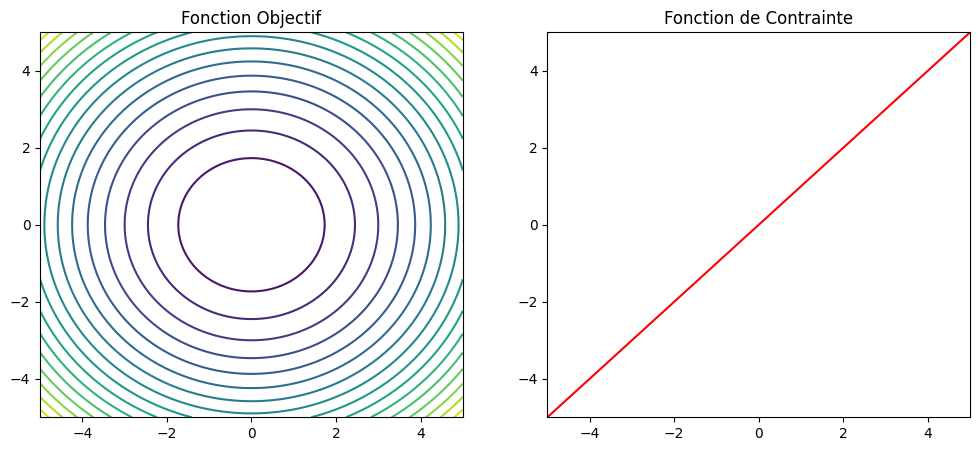

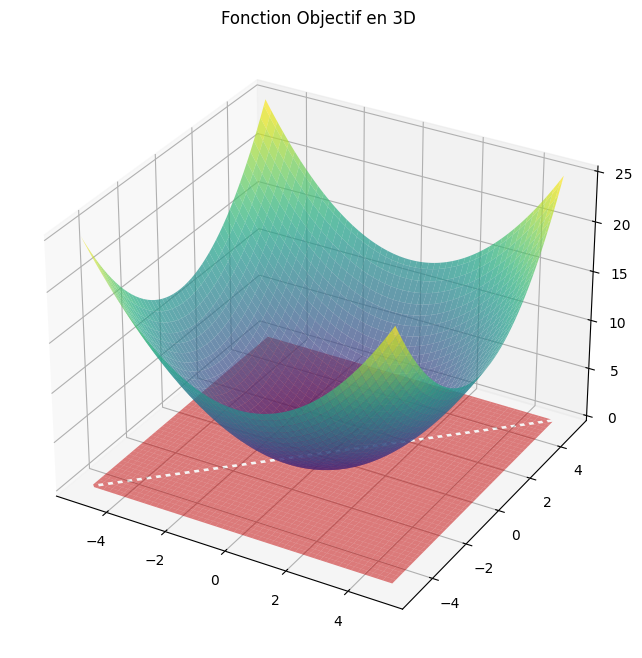

In [ ]:
Trace ( f, g1)

### Application de la première fonction d'uzawa ( avec N itérations)

In [ ]:
x_optimal_example, lambda_optimal_example  = uzawa_algorithm_Nmax(
    objective_func = f,
    gradient_func = f_gradient,
    constraint_func = g1,
    gradient_constraint_func = g1_gradient,
    x0 = x0_example,
    lambda0 = lambda0_example,
    tau = tau,
    gd_step = alpha,
    tol = epsilon,
    max_iter = nb_iteration
)

print("Optimal (x,y):", x_optimal_example[-1])
print("Optimal lambda:", lambda_optimal_example[-1])

Optimal (x,y): [-7.06005797e-08  7.06005797e-08]
Optimal lambda: [0. 0.]


#### Historique des valeurs de $ (x,y) $

In [ ]:
print(*[ f"X={X} , f(X)={f(X)}" for X in x_optimal_example] , sep="\n")

X=[4. 4.] , f(X)=16.0
X=[4. 4.] , f(X)=16.0
X=[-0.96714758  1.01971145] , f(X)=0.9875929451211521
X=[-0.96714758  1.01971145] , f(X)=0.9875929451211521
X=[-0.90109392  0.90143929] , f(X)=0.812281528941926
X=[-0.90109392  0.90143929] , f(X)=0.812281528941926
X=[-0.81112543  0.8111277 ] , f(X)=0.6579263097716531
X=[-0.81112543  0.8111277 ] , f(X)=0.6579263097716531
X=[-0.72995459  0.7299546 ] , f(X)=0.5328337139509547
X=[-0.72995459  0.7299546 ] , f(X)=0.5328337139509547
X=[-0.65690541  0.65690541] , f(X)=0.431524722728102
X=[-0.65690541  0.65690541] , f(X)=0.431524722728102
X=[-0.59116652  0.59116652] , f(X)=0.34947785746766646
X=[-0.59116652  0.59116652] , f(X)=0.34947785746766646
X=[-0.53200636  0.53200636] , f(X)=0.2830307660696858
X=[-0.53200636  0.53200636] , f(X)=0.2830307660696858
X=[-0.47876657  0.47876657] , f(X)=0.2292174248818029
X=[-0.47876657  0.47876657] , f(X)=0.2292174248818029
X=[-0.43085467  0.43085467] , f(X)=0.1856357476575832
X=[-0.43085467  0.43085467] , f(X)=0.185

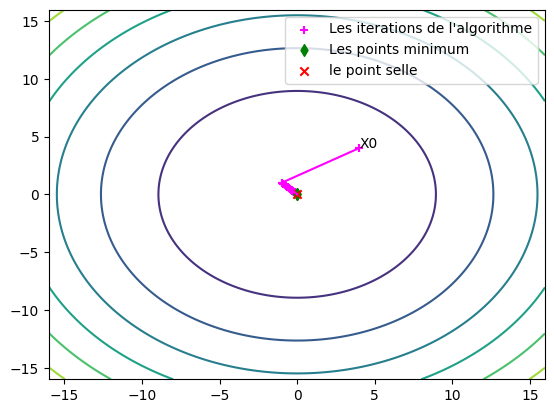

In [ ]:
plot_contour_1(f, g1,x_optimal_example, x0_example)

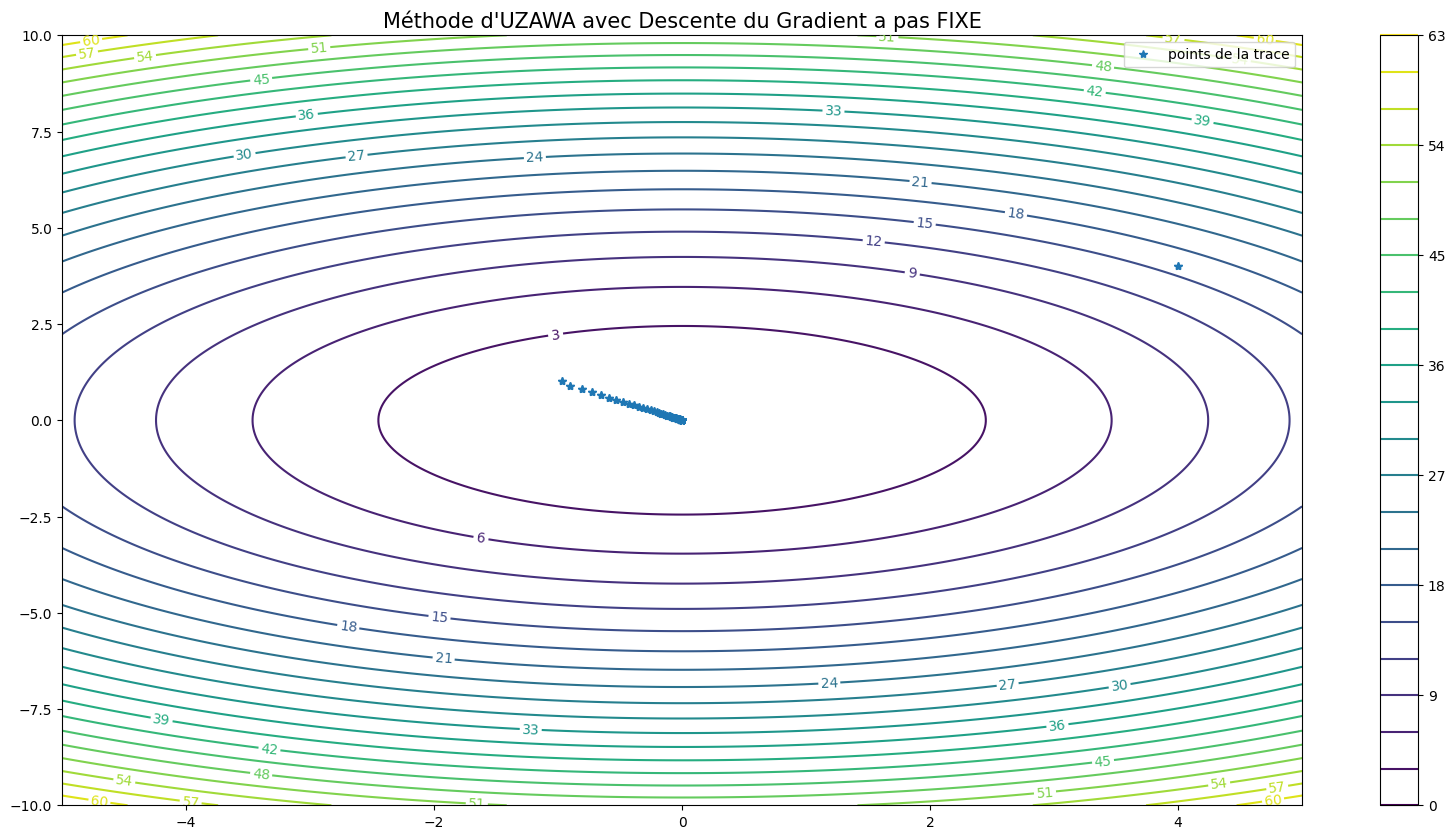

In [ ]:
plot_contour_2(f, x_optimal_example, "Méthode d'UZAWA avec Descente du Gradient a pas FIXE")


### Application de la première fonction d'uzawa ( avec la méthode des incréments)

In [ ]:
x_optimal, lambda_optimal= uzawa_algorithm_Tol(
    objective_func = f,
    gradient_func = f_gradient,
    constraint_func = g1,
    gradient_constraint_func = g1_gradient,
    x0 = x0_example,
    lambda0 = lambda0_example,
    tau = tau,
    gd_step = alpha,
    tol = epsilon,
)

print("Optimal (x,y):", x_optimal[-1])
print("Optimal lambda:", lambda_optimal[-1])

Converged after 129 iterations.
Optimal (x,y): [-5.85840608e-07  5.85840608e-07]
Optimal lambda: [4.56728563e-07 4.56728563e-07]


#### Historique des valeurs de $ (x,y) $

In [ ]:
print(*[ f"X={X} , f(X)={f(X)}" for X in x_optimal] , sep="\n")

X=[4. 4.] , f(X)=16.0
X=[4. 4.] , f(X)=16.0
X=[0.83016171 2.09809702] , f(X)=2.5455897900388953
X=[0.83016171 2.09809702] , f(X)=2.5455897900388953
X=[-0.28991013  1.36174753] , f(X)=0.9692021021060795
X=[-0.28991013  1.36174753] , f(X)=0.9692021021060795
X=[-0.64753777  1.03986492] , f(X)=0.7503121021538333
X=[-0.64753777  1.03986492] , f(X)=0.7503121021538333
X=[-0.72495311  0.86855754] , f(X)=0.6399746036368691
X=[-0.72495311  0.86855754] , f(X)=0.6399746036368691
X=[-0.70277792  0.75534178] , f(X)=0.532219008047875
X=[-0.70277792  0.75534178] , f(X)=0.532219008047875
X=[-0.64844105  0.66768112] , f(X)=0.43313693475693316
X=[-0.64844105  0.66768112] , f(X)=0.43313693475693316
X=[-0.58683305  0.59387554] , f(X)=0.34853059107642925
X=[-0.58683305  0.59387554] , f(X)=0.34853059107642925
X=[-0.52685598  0.52943376] , f(X)=0.27893866047154725
X=[-0.52685598  0.52943376] , f(X)=0.27893866047154725
X=[-0.47141975  0.4723633 ] , f(X)=0.22268183569797848
X=[-0.47141975  0.4723633 ] , f(X)=0.

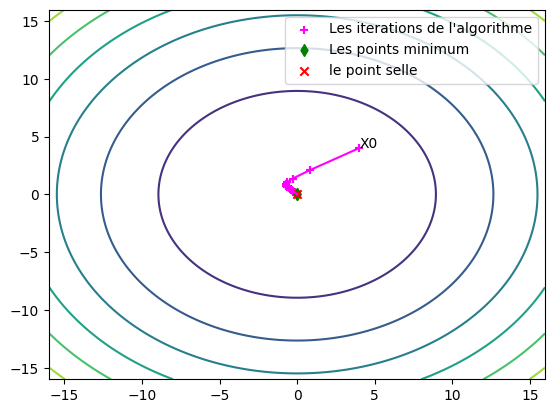

In [ ]:
plot_contour_1(f, g1, x_optimal, x0_example)

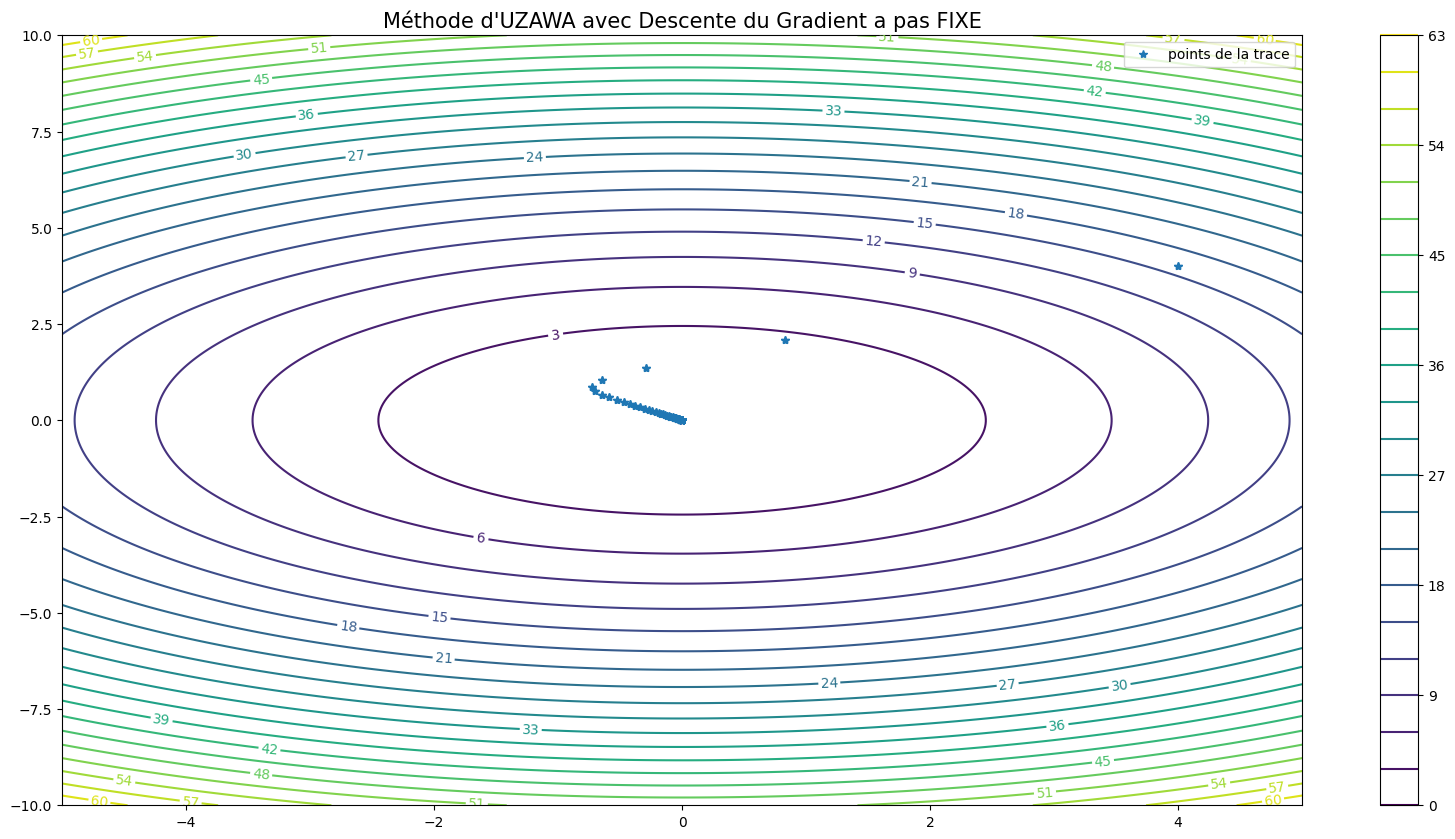

In [ ]:
plot_contour_2(f, x_optimal, "Méthode d'UZAWA avec Descente du Gradient a pas FIXE")


### TEST N°2:
Soit la fonction objectif définie pour $x = ( x_{1}, x_{2})  \in    \Re ^{2}$  par :

$$f(x,y) = \frac{1}{2} x^2 + 100y^2 $$

On cherche un minimiseur dans l'ensemble $C = \big\{ x \in \Re ^{2} :  g_{1}(x) \leq 0 \big\}$ avec :

$$  g_1(x,y) = x - y $$




$$ \nabla f(x,y) = \begin{bmatrix} x  \\ 200y \end{bmatrix} $$

$$\nabla^2 f(x, y) = \begin{bmatrix} 1 & 0 \\ 0 & 200 \end{bmatrix} $$

$$ ( \nabla^2 f(x, y) )^{-1} = \begin{bmatrix} 1 & 0 \\ 0 & \frac{1}{200} \end{bmatrix} $$


Remarque : Le conditionnement de cette fonction est >> 1  donc cette fonction quadratique est mal conditionné

In [ ]:
def f2(x):
    return 0.5 * x[0]**2 + 200 * x[1]**2

def f2_gradient(x):
    return np.array([x[0], 200 * x[1]])

def g_1(x):
    return np.array([x[0] - x[1]])

def g_1_gradient(x, lambda_):
    return np.array([1, -1])


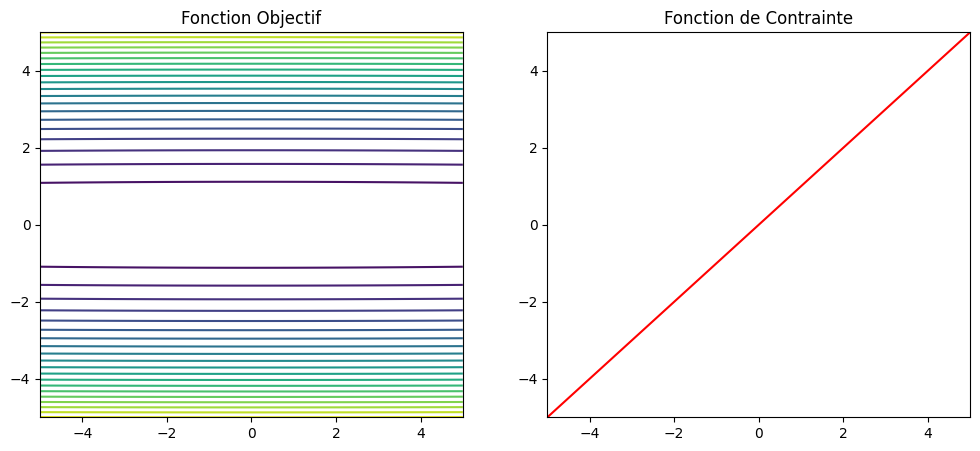

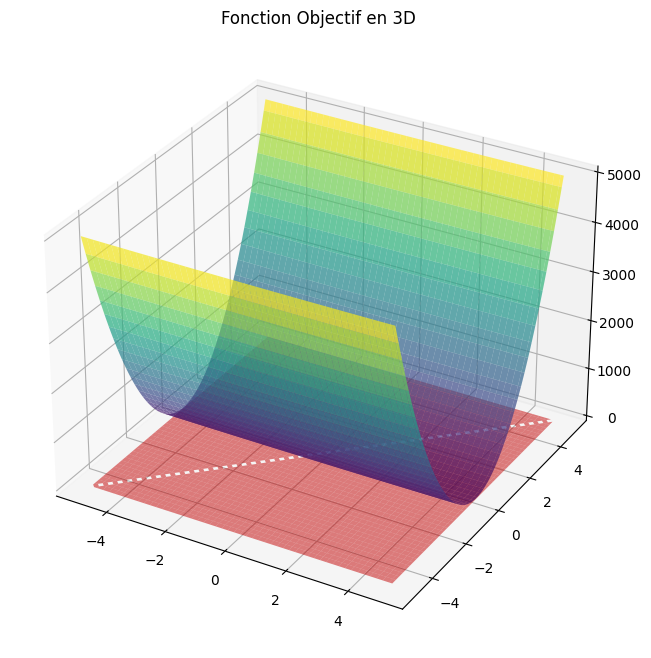

In [ ]:
Trace(f2, g_1)

### Application de la première fonction d'uzawa ( avec N itérations)

In [ ]:
x_optimal_f2, lambda_optimal_f2  = uzawa_algorithm_Nmax(
    objective_func = f2,
    gradient_func = f2_gradient,
    constraint_func = g_1,
    gradient_constraint_func = g_1_gradient,
    x0 = x0_example,
    lambda0 = lambda0_example,
    tau = tau,
    gd_step = 0.00001,
    tol = epsilon,
    max_iter = nb_iteration
)

print("Optimal (x,y):", x_optimal_f2[-1])
print("Optimal lambda:", lambda_optimal_f2[-1])

Optimal (x,y): [-5.32688836e-001  3.56533046e-135]
Optimal lambda: [0. 0.]


#### Historique des valeurs de $ (x,y) $

In [ ]:
print(*[ f"X={X} , f(X)={f2(X)}" for X in x_optimal_f2] , sep="\n")

X=[4. 4.] , f(X)=3208.0
X=[4. 4.] , f(X)=3208.0
X=[3.97506227 1.47320746] , f(X)=441.96860593022745
X=[3.97506227 1.47320746] , f(X)=441.96860593022745
X=[3.94962502 0.54497837] , f(X)=67.20005274703088
X=[3.94962502 0.54497837] , f(X)=67.20005274703088
X=[3.92346559 0.20438208] , f(X)=16.051197687510406
X=[3.92346559 0.20438208] , f(X)=16.051197687510406
X=[3.89650918 0.07979718] , f(X)=8.864909718060018
X=[3.89650918 0.07979718] , f(X)=8.864909718060018
X=[3.86873541 0.03461433] , f(X)=7.723187188636666
X=[3.86873541 0.03461433] , f(X)=7.723187188636666
X=[3.84014402 0.01861538] , f(X)=7.442659562472732
X=[3.84014402 0.01861538] , f(X)=7.442659562472732
X=[3.81074223 0.01333986] , f(X)=7.2964685632115875
X=[3.81074223 0.01333986] , f(X)=7.2964685632115875
X=[3.7805401 0.0120015] , f(X)=7.175048933948655
X=[3.7805401 0.0120015] , f(X)=7.175048933948655
X=[3.74954882 0.01210553] , f(X)=7.058866925310737
X=[3.74954882 0.01210553] , f(X)=7.058866925310737
X=[3.71778007 0.01273473] , f(X)

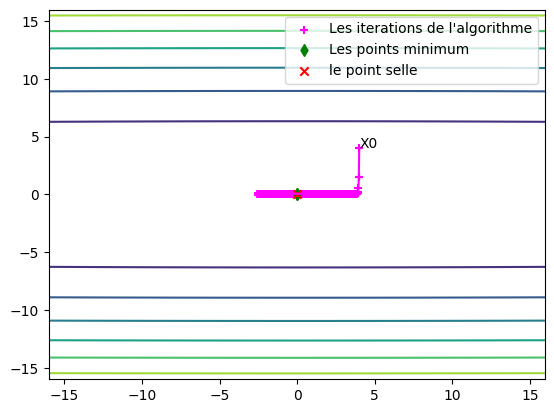

In [ ]:
plot_contour_1(f2, g_1,x_optimal_f2, x0_example)

### Application d'uzawa ( avec N itérations) et DGPV


In [ ]:
x_optimal_f2, lambda_optimal_f2  = uzawa_algorithm_Nmax_dgpv(
    objective_func = f2,
    gradient_func = f2_gradient,
    constraint_func = g_1,
    gradient_constraint_func = g_1_gradient,
    x0 = x0_example,
    lambda0 = lambda0_example,
    tau = tau,
    gd_step = 0.00001,
    tol = epsilon,
    max_iter = nb_iteration
)

print("Optimal (x,y):", x_optimal_f2[-1])
print("Optimal lambda:", lambda_optimal_f2[-1])

Optimal (x,y): [3.68899817 0.56472641]
Optimal lambda: [57.85165965 57.85165965]


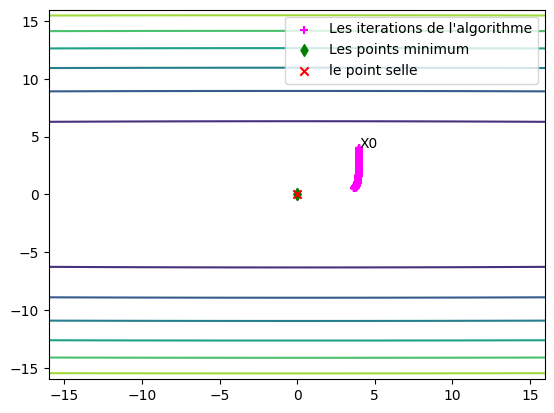

In [ ]:
plot_contour_1(f2, g_1,x_optimal_f2, x0_example)

In [ ]:
x_optimal_f2, lambda_optimal_f2  = uzawa_algorithm_Tol_dgpv(
    objective_func = f2,
    gradient_func = f2_gradient,
    constraint_func = g_1,
    gradient_constraint_func = g_1_gradient,
    x0 = x0_example,
    lambda0 = lambda0_example,
    tau = tau,
    gd_step = 0.8,
    tol = epsilon
)

print("Optimal (x,y):", x_optimal_f2[-1])
print("Optimal lambda:", lambda_optimal_f2[-1])

<ipython-input-59-951e9178cca5>:5: RuntimeWarning: overflow encountered in double_scalars
  return np.array([x[0], 200 * x[1]])
<ipython-input-41-42b0a66858f9>:11: RuntimeWarning: invalid value encountered in subtract
  x = x - step_size * gradient


In [ ]:
plot_contour_1(f2, g_1,x_optimal_f2, x0_example)